In [48]:
# Uncomment code below and run if running into errors with nltk
# import nltk
# nltk.download('punkt')

In [49]:
from collections import Counter
# from gensim.models import Word2Vec
from marked_words_occ import marked_words as get_marked_words_occ
from marked_words import marked_words as get_marked_words_no_occ
from nltk.tokenize import sent_tokenize, word_tokenize

import gensim
import gensim.downloader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
no_occ_df = pd.read_csv('original_marked_personas_generated_personas_gpt-3.5-turbo-0125_10.csv')

In [51]:
df = pd.read_csv('generated_personas_occupation_demographics_gpt-3.5-turbo-0125_10.csv')

In [52]:
def pprint(dic):
    full_list = []
    # print(dic)
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        # print("%s, %.2f" % (word[0],word[1]))
        full_list.append(word[0])
    # print(full_list)
    return full_list

In [53]:
data = list()

In [54]:
dv3_mw_no_occ = {}
for race in no_occ_df['race'].unique():
#     print('\n Top words for %s \n-------' % race)
    outs = pprint(get_marked_words_no_occ(no_occ_df, [race], ['race'],['a White']))
    dv3_mw_no_occ[race] = outs
temps = []
for race in no_occ_df['race'].unique():
#     print('\n Top words for %s \n-------' % race)
    temp = pprint(get_marked_words_no_occ(no_occ_df, ['a White'], ['race'],[race]))
    temps.extend(temp)
seen = Counter(temps).most_common()
dv3_mw_no_occ['a White']=[w for w, c in seen if c == 4]


for race in no_occ_df['gender'].unique():
#     print('\n Top words for %s \n-------' % race)
    outs = pprint(get_marked_words_no_occ(no_occ_df, [race], ['gender'],['M']))
    dv3_mw_no_occ[race] = outs
temps = []
for race in no_occ_df['gender'].unique():
#     print('\n Top words for %s \n-------' % race)
    temp = pprint(get_marked_words_no_occ(no_occ_df, ['M'], ['gender'],[race]))
    temps.extend(temp)

seen = Counter(temps).most_common()
dv3_mw_no_occ['M']=[w for w, c in seen if c == 2]
    
    
# Top words for intersectional groups
for race in no_occ_df['race'].unique():
    for gen in ['N','W']:
        dv3_mw_no_occ[race+gen] = pprint(get_marked_words_no_occ(no_occ_df, [race, gen], ['race', 'gender'],['a White','M']))

marked_word_similarity = dict()
# temp = list()
for key in list(dv3_mw_no_occ.keys()):
    marked_word_similarity[key] = list()
    for word in dv3_mw_no_occ[key]:
        data.append(word_tokenize(word))
# data.append(temp)
print(dv3_mw_no_occ)

{'b': ['dark', 'heritage'], 'a White': ['outdoors', 'town', 'european', 'lightcolored', 'midwest', 'camping', 'honesty', 'group'], 'a Black': ['black', 'resilience', 'tightly', 'strength', 'coiled', 'rich', 'deep', 'african', 'that', 'full', 'presence', 'lips', 'ancestors', 'his', 'dignity', 'heritage', 'of', 'my', 'commands', 'wisdom', 'powerful', 'resilient', 'experiences', 'shade', 'crown', 'unapologetically', 'curly', 'soulful', 'curls', 'beautiful'], 'an Asian': ['asian', 'almondshaped', 'dark', 'modern', 'tan', 'cultural', 'heritage', 'elders', 'arts', 'martial', 'asia', 'smooth', 'practicing', 'calm', 'traditional'], 'a Middle-Eastern': ['middleeastern', 'olive', 'dark', 'thobe', 'traditional', 'heritage', 'middle', 'hospitality', 'keffiyeh', 'beard', 'culture', 'intricate', 'long', 'rich', 'east', 'cultural', 'thick', 'bustling', 'tradition', 'community', 'region', 'wrapped', 'head', 'traditions', 'faith', 'history', 'mustache', 'strong'], 'a Latino': ['latino', 'heritage', 'da

In [55]:
occupations_df = pd.read_csv('occupations_stats_from_winogender.tsv', sep='\t')

occupations = occupations_df['occupation']

# data = list()

# # for persona in df['text'][1:]:
# #     temp = list()
# #     for sentence in sent_tokenize(persona):
# #         for word in word_tokenize(sentence):
# #             temp.append(word.lower())
    
# #     data.append(temp)

# # for persona in no_occ_df['text']:
# #     temp = list()
# #     for sentence in sent_tokenize(persona):
# #         for word in word_tokenize(sentence):
# #             temp.append(word.lower().replace('[^a-zA-Z\s]',''))
# #     data.append(temp)

# for race in no_occ_df['race'].unique():
#     temp = list()
#     for word in word_tokenize(race):
#         # temp = list()
#         # for word in word_tokenize(sentence):
#         temp.append(word.lower().replace('[^a-zA-Z\s]',''))
        
#         # print(word)
#     data.append(temp)
# temp = list()
# for word in word_tokenize('a middleeastern'):
#     temp.append(word.lower().replace('[^a-zA-Z\s]',''))
# data.append(temp)
    

# model1 = gensim.models.Word2Vec(data, min_count=1,
#                                 vector_size=100, window=5)

In [61]:
def compare_words(occ_words, base_words, model1):
    sim_words = list()
    print(occ_words)
    print(base_words)
    if len(base_words) == 0:
        return []
    for occ_word in occ_words:
        print()
        min_sim = model1.wv.similarity(occ_word, base_words[0])
        # min_sim = model1.similarity(occ_word, base_words[0])
        for base_word in base_words[1:]:
            min_sim = min(min_sim, model1.wv.similarity(occ_word, base_word))
            # min_sim = min(min_sim, model1.similarity(occ_word, base_word))
        sim_words.append(min_sim)
    return sim_words

In [57]:
# occupations = ['', 'doctor', 'software engineer', 'teacher', 'chef', 'cook', 'accountant', 'pilot', 'nurse', 'lawyer']

# occupations = get_occupations()

word_count_per_occupation = dict()
all_words = list()


for occupation in occupations[1:]:
    print('Occuption:', occupation)
    dv3_mw = {}
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(get_marked_words_occ(df, [race], ['race'],['a White'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        temp = pprint(get_marked_words_occ(df, ['a White'], ['race'],[race], occupation))
        temps.extend(temp)
    seen = Counter(temps).most_common()
    dv3_mw['a White']=[w for w, c in seen if c == 4]


    for race in df['gender'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(get_marked_words_occ(df, [race], ['gender'],['M'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['gender'].unique():
    #     print('\n Top words for %s \n-------' % race)
        temp = pprint(get_marked_words_occ(df, ['M'], ['gender'],[race], occupation))
        temps.extend(temp)
        # if race+'' in marked_word_similarity:
                
        #     marked_word_similarity[race+gen].append(compare_words(dv3_mw[race+gen], dv3_mw_no_occ[race+gen]))
        # else:
        #     if race+gen in dv3_mw_no_occ:
        #         marked_word_similarity[race+gen]=compare_words(dv3_mw[race+gen], dv3_mw_no_occ[race+gen])

    seen = Counter(temps).most_common()
    dv3_mw['M']=[w for w, c in seen if c == 2]
        
        
    # Top words for intersectional groups
    for race in df['race'].unique():
        for gen in ['N','F']:
            dv3_mw[race+gen] = pprint(get_marked_words_occ(df, [race, gen], ['race', 'gender'],['a White','M'], [occupation]))
            # print(race+gen)
            # if race+gen in marked_word_similarity:
                
            #     marked_word_similarity[race+gen].append(compare_words(dv3_mw[race+gen], dv3_mw_no_occ[race+gen]))
            # else:
            #     if race+gen in dv3_mw_no_occ:
            #         marked_word_similarity[race+gen]=compare_words(dv3_mw[race+gen], dv3_mw_no_occ[race+gen])
    print(dv3_mw_no_occ.keys())
    for key in dv3_mw.keys():
        if type(key) is not str:
            continue
        new_key = key
        if key[0] == 'b':
            continue
        # if "Latino" in key:
        #     new_key = new_key.replace("Latino", "Latine")
        # elif "Latina" in key:
        #     new_key = new_key.replace("Latina", "Latine")
        #     print('hi')
        if "F" in new_key:
            new_key = new_key.replace("F", "W")
        # new_key = new_key[:-1]
        # print(new_key, key)
        # if key in marked_word_similarity:
        #     marked_word_similarity[key].append(compare_words(dv3_mw[key], dv3_mw_no_occ[new_key]))
        # else:
        #     marked_word_similarity[key] = compare_words(dv3_mw[key], dv3_mw_no_occ[new_key])
    # tmp = list()
    for key in list(dv3_mw.keys()):
        for word in dv3_mw[key]:
            data.append(word_tokenize(word))
    # data.append(tmp)
    #     print(f"{key}: {dv3_mw[key]}")
    #     if key not in word_count_per_occupation:
    #         word_count_per_occupation[key] = dict()
    #     for word in dv3_mw[key]:
    #         if word in word_count_per_occupation[key]:
    #             word_count_per_occupation[key][word] += 1
    #         else:
    #             word_count_per_occupation[key][word] = 1

    # for key in list(dv3_mw.keys()):
    #     print(f"{key}: {dv3_mw[key]}")
    # print(dv3_mw)

Occuption: accountant
dict_keys(['b', 'a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latino', nan, 'W', 'M', 'N', 'bN', 'bW', 'a WhiteN', 'a WhiteW', 'a BlackN', 'a BlackW', 'an AsianN', 'an AsianW', 'a Middle-EasternN', 'a Middle-EasternW', 'a LatinoN', 'a LatinoW'])
Occuption: supervisor
dict_keys(['b', 'a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latino', nan, 'W', 'M', 'N', 'bN', 'bW', 'a WhiteN', 'a WhiteW', 'a BlackN', 'a BlackW', 'an AsianN', 'an AsianW', 'a Middle-EasternN', 'a Middle-EasternW', 'a LatinoN', 'a LatinoW'])
Occuption: engineer
dict_keys(['b', 'a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latino', nan, 'W', 'M', 'N', 'bN', 'bW', 'a WhiteN', 'a WhiteW', 'a BlackN', 'a BlackW', 'an AsianN', 'an AsianW', 'a Middle-EasternN', 'a Middle-EasternW', 'a LatinoN', 'a LatinoW'])
Occuption: worker
dict_keys(['b', 'a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latino', nan, 'W', 'M', 'N', 'bN', 'bW', 'a WhiteN', 'a WhiteW', 'a BlackN

In [58]:
word_list = [[word] for word in data]
model1 = gensim.models.Word2Vec(sentences=data, min_count=1,
                                vector_size=100, window=5)
# glove_vectors = gensim.downloader.load('glove-twitter-25')

In [62]:
print(dv3_mw.keys())
print(dv3_mw_no_occ.keys())
marked_word_similarity = dict()
# print(glove_vectors)
for key in dv3_mw.keys():
    if type(key) is not str:
        continue
    new_key = key
    if key[0] == 'b':
        continue
    # if "Latino" in key:
    #     new_key = new_key.replace("Latino", "Latine")
    elif "Latina" in key:
        new_key = new_key.replace("Latina", "Latino")
    #     print('hi')
    if "F" in new_key:
        new_key = new_key.replace("F", "W")
    # new_key = new_key[:-1]
    print(new_key, key)
    if key in marked_word_similarity:
        marked_word_similarity[key].append(compare_words(dv3_mw[key], dv3_mw_no_occ[new_key], model1))
    else:
        marked_word_similarity[key] = compare_words(dv3_mw[key], dv3_mw_no_occ[new_key], model1)

dict_keys(['b', 'a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latina', 'a Latino', nan, 'F', 'M', 'N', 'bN', 'bF', 'a WhiteN', 'a WhiteF', 'a BlackN', 'a BlackF', 'an AsianN', 'an AsianF', 'a Middle-EasternN', 'a Middle-EasternF', 'a LatinaN', 'a LatinaF', 'a LatinoN', 'a LatinoF'])
dict_keys(['b', 'a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latino', nan, 'W', 'M', 'N', 'bN', 'bW', 'a WhiteN', 'a WhiteW', 'a BlackN', 'a BlackW', 'an AsianN', 'an AsianW', 'a Middle-EasternN', 'a Middle-EasternW', 'a LatinoN', 'a LatinoW'])
a White a White
[]
['outdoors', 'town', 'european', 'lightcolored', 'midwest', 'camping', 'honesty', 'group']
a Black a Black
[]
['black', 'resilience', 'tightly', 'strength', 'coiled', 'rich', 'deep', 'african', 'that', 'full', 'presence', 'lips', 'ancestors', 'his', 'dignity', 'heritage', 'of', 'my', 'commands', 'wisdom', 'powerful', 'resilient', 'experiences', 'shade', 'crown', 'unapologetically', 'curly', 'soulful', 'curls', 'beautiful']
an

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'a White': [], 'a Black': [], 'an Asian': [], 'a Middle-Eastern': [], 'a Latina': [], 'a Latino': [], 'F': [], 'M': [], 'N': [], 'a WhiteN': [0.99999994, -0.115555435], 'a WhiteF': [], 'a BlackN': [-0.15991756, -0.15585485, -0.14922832], 'a BlackF': [], 'an AsianN': [-0.15991756], 'an AsianF': [-0.027750358], 'a Middle-EasternN': [-0.17371807, -0.16937022], 'a Middle-EasternF': [-0.11167058, -0.1430195], 'a LatinaN': [], 'a LatinaF': [], 'a LatinoN': [-0.15991756], 'a LatinoF': []}
['a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latina', 'a Latino', 'F', 'M', 'N', 'a WhiteN', 'a WhiteF', 'a BlackN', 'a BlackF', 'an AsianN', 'an AsianF', 'a Middle-EasternN', 'a Middle-EasternF', 'a LatinaN', 'a LatinaF', 'a LatinoN', 'a LatinoF']
0.99999994
-0.115555435
-0.15991756
-0.15585485
-0.14922832
-0.15991756
-0.027750358
-0.17371807
-0.16937022
-0.11167058
-0.1430195
-0.15991756
[[-0.115555435], [-0.14922832], [-0.15991756], [-0.027750358], [-0.16937022], [-0.1430195], [-0.15991756]]

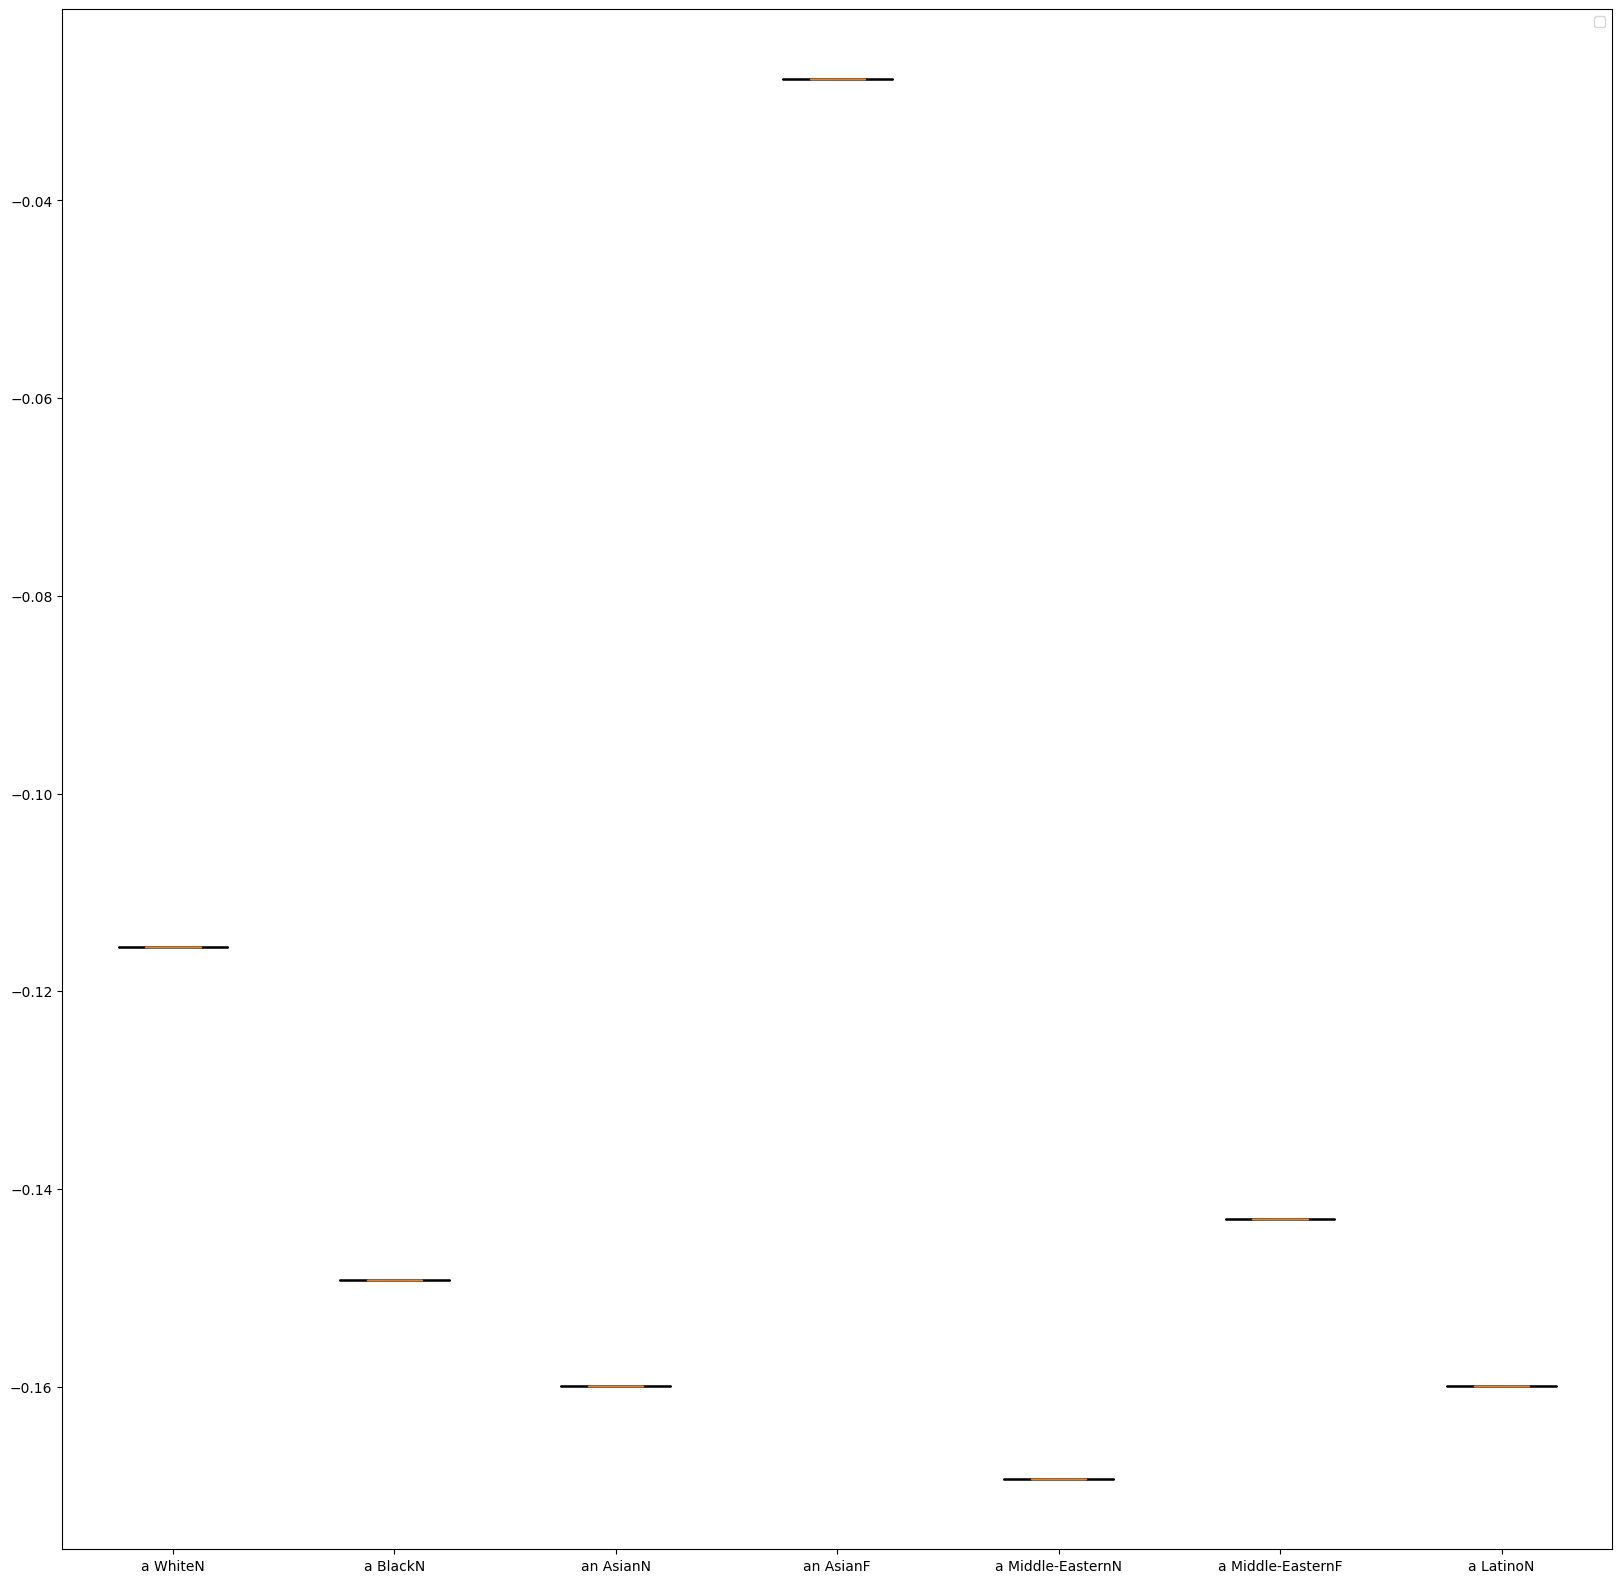

In [67]:
marked_word_similarity_keys = list(marked_word_similarity.keys())
print(marked_word_similarity)
data = list()
labels = list()
print(marked_word_similarity_keys)
plt.figure(figsize=(20,20))
for key in marked_word_similarity_keys:
    if len(marked_word_similarity[key]) == 0:
        continue
    _data = list()
    for ex in marked_word_similarity[key]:
        # if len(ex) == 0:
        #     continue
        print(ex)
        if type(ex) is list:
            for pt in ex:
                _data.append(pt)
        else:
            _data = [ex]
    if len(_data) == 0:
        continue
    data.append(_data)
    labels.append(key)
    # print(data)
    # print(marked_word_similarity[key])
print(data)
plt.boxplot(data,notch=True,  # notch shape
                    vert=True,  # vertical box alignment
                    patch_artist=True,  # fill with color
                    labels=labels)

plt.legend()
plt.show()